Hello, and again, welcome back to see my work on my Artificial Intelligence Course - by Assoc. Prof. Nguyen Truong Thinh.\
**Topic: Clinical Decision Support System Based on Fuzzy Logic**\
In this notebook, a Clinical Decision Support System is presented with four fuzzy inference systems are implemented monitoring the renal function by the level of proteinuria and the glomerular filtration rate (GFR).\
There are two cases study consisting 2 systems on each, those are detailed below

**Reference source:** Improta, Giovanni, et al. "Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients." Journal of evaluation in clinical practice 26.4 (2020): 1224-1234.

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**CASE STUDY 1: THE PROTFIS AND GFRFIS**
1. The ProtFIS stands for Proteinuria Fuzzy Inference System or Fuzzy Logic-based Proteinuria Rate Prediction System
2. The GfrFIS stands for Glomerular Filltration Rate Fuzzy Inference System or Fuzzy Logic-based Glomerular Filltration Rate  Prediction System

**The ProtFIS**\
The ProtFIS evaluates the rate of proteinuria by considering 2 input parameters: Glycaemia and Blood Level of the m-Tor inhibitor

**The ProtFIS instance: The Glycaemia**

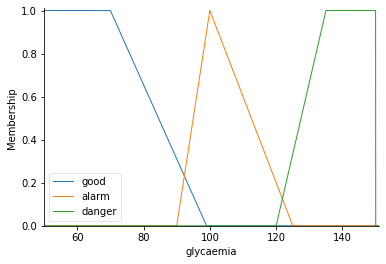

In [68]:
# Creat Antecedent - The Glycaemia
glycaemia = ctrl.Antecedent(np.arange(50.0, 151.0, 0.01), 'glycaemia')

# Create fuzzy sets of Antecedent
glycaemia['good'] = fuzz.trapmf(glycaemia.universe, [50.0, 50.0, 70.0, 99.0])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [90.0, 100.0, 125.0])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe, [120.0, 135.0, 150.0, 150.0])

# Take a look
glycaemia.view()

**The ProtFIS instance: The blood level of the Sirolimus**

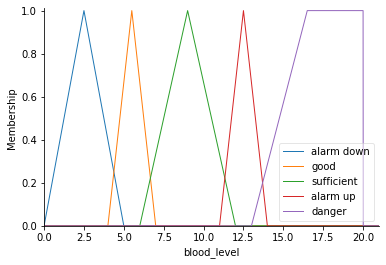

In [69]:
# Creat Antecedent - The Blood level - Sirolimus
blood_level = ctrl.Antecedent(np.arange(0.0, 21.0, 0.01), 'blood_level')

# Create fuzzy sets of Antecedent
blood_level['alarm down'] = fuzz.trimf(blood_level.universe, [0.0, 2.5, 5.0])
blood_level['good'] = fuzz.trimf(blood_level.universe, [4.0, 5.5, 7.0])
blood_level['sufficient'] = fuzz.trimf(blood_level.universe, [6.0, 9.0, 12.0])
blood_level['alarm up'] = fuzz.trimf(blood_level.universe, [11.0, 12.5, 14.0])
blood_level['danger'] = fuzz.trapmf(blood_level.universe, [13.0, 16.5, 20.0, 20.0])

# Take a look
blood_level.view()

**The ProtFIS output: The Proteinuria Rate**

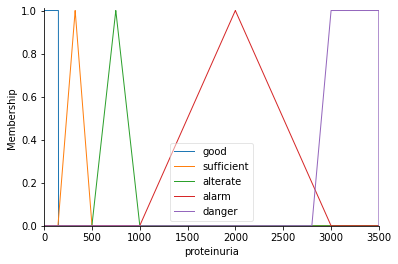

In [70]:
# Create Consequent - The Proteinuria Rate
proteinuria = ctrl.Consequent(np.arange(0, 3501.0, 0.01), 'proteinuria')

# Create ranges of output
proteinuria['good']       = fuzz.trapmf(proteinuria.universe, [0, 0, 150, 150])
proteinuria['sufficient'] = fuzz.trimf(proteinuria.universe, [145, 325, 500])
proteinuria['alterate']   = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm']      = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger']     = fuzz.trapmf(proteinuria.universe, [2800, 3000, 3500, 3500])

# Take a look
proteinuria.view()

**Inference Rule for ProtFIS**

In [71]:
# Making rules list
rule_proteinuria_lst = [ctrl.Rule(glycaemia['good']&blood_level['good'], proteinuria['good']),
                       ctrl.Rule(glycaemia['danger']&blood_level['danger'], proteinuria['danger']),
                       ctrl.Rule(glycaemia['good']&blood_level['sufficient'], proteinuria['sufficient']),
                       ctrl.Rule(glycaemia['alarm']&blood_level['alarm up'], proteinuria['alarm']),
                       ctrl.Rule(glycaemia['alarm']&blood_level['sufficient'], proteinuria['alterate']),
                       ctrl.Rule(glycaemia['good']&blood_level['alarm up'], proteinuria['alterate']),
                       ctrl.Rule(glycaemia['alarm']&blood_level['good'], proteinuria['sufficient']),
                       ctrl.Rule(glycaemia['good']&blood_level['alarm down'], proteinuria['sufficient'])
                        ]

**Train the System**

In [72]:
# Train the system
protFIS_predictor = ctrl.ControlSystem(rule_proteinuria_lst )
protFIS_pred = ctrl.ControlSystemSimulation(protFIS_predictor)

**Make Prediction**\
The prediction is made with the input values coming from the article

Predicted: 322.86418015542216 mg/24h


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


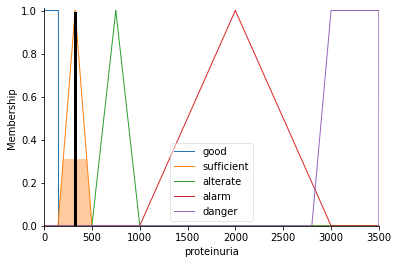

In [73]:
# Test an instance
protFIS_pred.input['glycaemia'] = 90.0
protFIS_pred.input['blood_level'] = 7.82
protFIS_pred.compute()

# Print
prot_res = protFIS_pred.output['proteinuria']
dis_str = "Predicted: {val} mg/24h".format(val = prot_res)   # Print predicted value
print(dis_str)
proteinuria.view(sim = protFIS_pred)   # Display on graph

It's looked like our result is quite different (about 33 units) from the author, but we still inside the range of 'Sufficient'. This is due to the missing information of the point between each fuzzy range

**The GfrFIS**\
The GfrFIS evaluates the GFR based on the 2 parameters:
Glycaemia (The same as in ProtFIS) and the Dosage of a Clcineurin Inhibitor

**The GfrFIS instance: The dosage of calcineurin inhibitor**

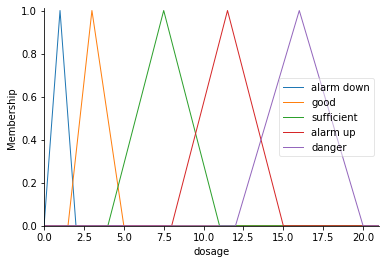

In [74]:
# Creat Antecedent - Dosage
dosage = ctrl.Antecedent(np.arange(0.0, 21.0, 0.01), 'dosage')

# Create fuzzy sets of Antecedent
dosage['alarm down'] = fuzz.trimf(dosage.universe, [0.0, 1.0, 2.0])
dosage['good']       = fuzz.trimf(dosage.universe, [1.5, 3.0, 5.0])
dosage['sufficient'] = fuzz.trimf(dosage.universe, [4.0, 7.5, 11.0])
dosage['alarm up']   = fuzz.trimf(dosage.universe, [8.0, 11.5, 15.0])
dosage['danger']     = fuzz.trimf(dosage.universe, [12.0, 16.0, 20.0])

# Take a look
dosage.view()

**The GfrFIS output: The GFR rate**

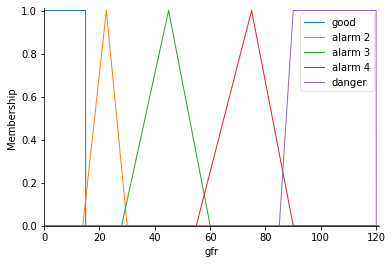

In [75]:
# Create Consequent - The Proteinuria Rate
gfr = ctrl.Consequent(np.arange(0.0, 121.0, 0.01), 'gfr')

# Create ranges of output
gfr['good']    = fuzz.trapmf(gfr.universe, [0, 0, 15.0, 15.0])
gfr['alarm 2'] = fuzz.trimf(gfr.universe, [14.0, 22.5, 30.0])
gfr['alarm 3'] = fuzz.trimf(gfr.universe, [28.0, 45.0, 60.0])
gfr['alarm 4'] = fuzz.trimf(gfr.universe, [55.0, 75.0, 90.0])
gfr['danger']  = fuzz.trapmf(gfr.universe, [85, 90.0, 120.0, 120.0])

# Take a look
gfr.view()

**Inference Rule for GfrFIS**

In [76]:
# Making rules list
rule_gfr_lst = [# 7 rules
                ctrl.Rule(glycaemia['danger']&dosage['danger'], gfr['danger']),
                ctrl.Rule(glycaemia['good']&dosage['danger'], gfr['alarm 3']),
                ctrl.Rule(glycaemia['alarm']&dosage['alarm up'], gfr['alarm 4']),
                ctrl.Rule(glycaemia['good']&dosage['sufficient'], gfr['alarm 2']),
                ctrl.Rule(glycaemia['good']&dosage['good'], gfr['good']),
                ctrl.Rule(glycaemia['alarm']&dosage['good'], gfr['alarm 2']),
                ctrl.Rule(glycaemia['danger']&dosage['good'], gfr['alarm 3'])
                ]

**Train the GfrFIS system**

In [77]:
# Train the system
gfrFIS_predictor = ctrl.ControlSystem(rule_gfr_lst )
gfrFIS_pred = ctrl.ControlSystemSimulation(gfrFIS_predictor)

**Make Prediction**\
The prediction is made with the input values coming from the article

Predicted: 44.199316239315905 mL/min


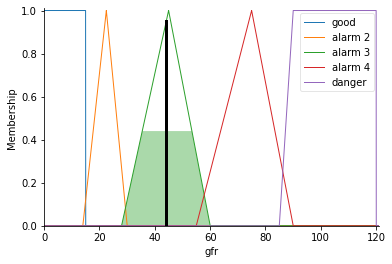

In [78]:
# Test an instance
gfrFIS_pred.input['glycaemia'] = 142.0
gfrFIS_pred.input['dosage'] = 4.12
gfrFIS_pred.compute()

# Print
gfr_res = gfrFIS_pred.output['gfr']
dis_str = "Predicted: {val} mL/min".format(val = gfr_res)   # Print predicted value
print(dis_str)
gfr.view(sim = gfrFIS_pred)   # Display on graph

Suprisingly, at this time our output is really close to the authors' one (about 1 units). Priorly, the authors' output is 43.20 mL/min

**CASE STUDY 2: THE PROTACE AND GFRACE**
1. The ProtACE stands for Proteinuria Angiotensin-converting enzyme, this means the system will predict the proteinuria based on the Glycaemia and the **decreasing** of the dosage of ACE-Inhibitor drug
2. The GfrFIS stands for Glomerular Filltration Rate Angiotensin-converting enzyme, this means the system will predict the GFR based on the Glycaemia and the **increasing** in the dose of ACE-Inhibitor drug

**The ProtACE**\
The variation of proteinuria is evaluated by loading in input two
parameters: prior glycaemia and the decreasing of the dosage of the ACE‐
Inhibitor drug

**The ProtACE instance: The differences of
ACE‐inhibitor dosage**

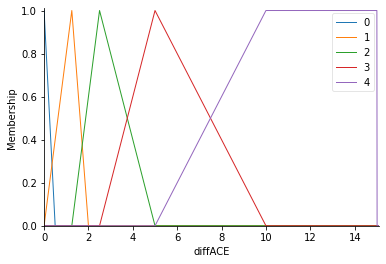

In [79]:
# Creat Antecedent - The differences of ACE - positive
diffACE = ctrl.Antecedent(np.arange(0.0, 15.1, 0.01), 'diffACE')

# Create fuzzy sets of Antecedent
diffACE['0'] = fuzz.trimf(diffACE.universe, [0.0, 0.0, 0.5])
diffACE['1'] = fuzz.trimf(diffACE.universe, [0.0, 1.25, 2.0])
diffACE['2'] = fuzz.trimf(diffACE.universe, [1.25, 2.5, 5.0])
diffACE['3'] = fuzz.trimf(diffACE.universe, [2.5, 5.0, 10.0])
diffACE['4'] = fuzz.trapmf(diffACE.universe, [5.0, 10.0, 15.0, 15.0])

# Take a look
diffACE.view()

**The ProtACE output: Proteinuria Level**

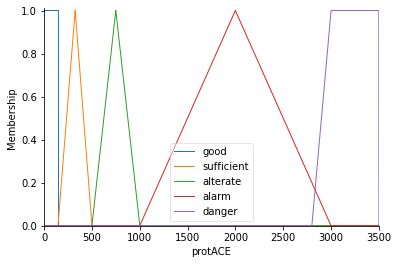

In [80]:
# Create Consequent - The Proteinuria Rate
protACE = ctrl.Consequent(np.arange(0.0, 3501.0, 0.01), 'protACE')

# Create ranges of output
protACE['good']       = fuzz.trapmf(proteinuria.universe, [0, 0, 150, 150])
protACE['sufficient'] = fuzz.trimf(proteinuria.universe, [145, 325, 500])
protACE['alterate']   = fuzz.trimf(proteinuria.universe, [500, 750, 1000])
protACE['alarm']      = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
protACE['danger']     = fuzz.trapmf(proteinuria.universe, [2800, 3000, 3500, 3500])

# Take a look
protACE .view()

**Inference Rules for ProtACE**

In [81]:
# Making rules list
rule_protACE_lst = [ # 8 rules
                    ctrl.Rule((glycaemia['good']|glycaemia['alarm']|glycaemia['danger'])
                    &diffACE['2'], protACE['sufficient']),
                    ctrl.Rule(glycaemia['good']&diffACE['1'], protACE['sufficient']),
                    ctrl.Rule(glycaemia['alarm']&diffACE['1'], protACE['alterate']),
                    ctrl.Rule(glycaemia['danger']&diffACE['1'], protACE['alarm']),
                    ctrl.Rule(glycaemia['alarm']&diffACE['3'], protACE['alarm']),
                    ctrl.Rule(glycaemia['good']&diffACE['3'], protACE['alterate']),
                    ctrl.Rule(glycaemia['danger']&diffACE['4'], protACE['danger']),
                    ctrl.Rule(glycaemia['good']&diffACE['0'], protACE['good'])
                    ]

**Train the predicting system**

In [82]:
# Train the system
protACE_predictor = ctrl.ControlSystem(rule_protACE_lst)
protACE_pred = ctrl.ControlSystemSimulation(protACE_predictor)

**Make Prediction**\
This prediction used the exact conditions of the authors

Predicted: 323.1859711170342 mg/24h


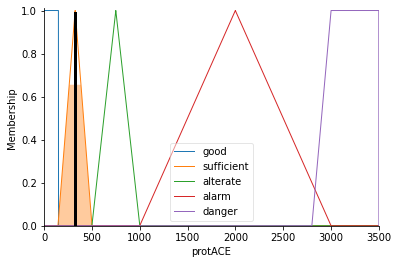

In [83]:
# Test an instance
protACE_pred.input['glycaemia'] = 80.0
protACE_pred.input['diffACE'] = 2.5
protACE_pred.compute()

# Print
protACE_res = protACE_pred.output['protACE']
dis_str = "Predicted: {val} mg/24h".format(val = protACE_res)   # Print predicted value
print(dis_str)
protACE.view(sim = protACE_pred)   # Display on graph

The predicted value is quite close to the authors' output of 316, that is about 7 units

**The GfrACE**\
The variation of proteinuria is evaluated by loading in input two
parameters: prior glycaemia and the increasing of the dosage of the ACE‐
Inhibitor drug

**The GfrACE instance: The differences of
ACE‐inhibitor dosage (negative)**

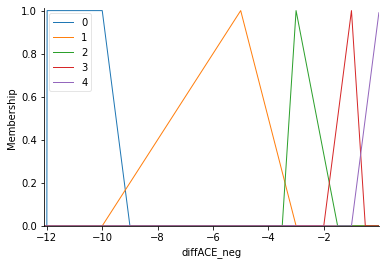

In [84]:
# Creat Antecedent - The negative differences of ACE-inhibitor
diffACE_neg = ctrl.Antecedent(np.arange(-12.1, 0.0, 0.01), 'diffACE_neg')

# Create fuzzy sets of Antecedent
diffACE_neg['0'] = fuzz.trapmf(diffACE_neg.universe, [-12.0, -12.0, -10.0, -9.0])
diffACE_neg['1'] = fuzz.trimf(diffACE_neg.universe, [-10.0, -5.0, -3.0])
diffACE_neg['2'] = fuzz.trimf(diffACE_neg.universe, [-3.5, -3.0, -1.5])
diffACE_neg['3'] = fuzz.trimf(diffACE_neg.universe, [-2.0, -1.0, -0.5])
diffACE_neg['4'] = fuzz.trimf(diffACE_neg.universe, [-1.0, 0.0, 0.0])

# Take a look
diffACE_neg.view()

**The GfrACE output: The GFR** (The same as the previous GFR)

At this time, we only need to make inference rules for the GfrACE

In [85]:
rule_gfrACE_lst = [ # 9 rules
                    ctrl.Rule(glycaemia['good']&diffACE_neg['2'], gfr['alarm 3']),
                    ctrl.Rule(glycaemia['alarm']&diffACE_neg['2'], gfr['alarm 3']),
                    ctrl.Rule(glycaemia['good']&diffACE_neg['1'], gfr['alarm 2']),
                    ctrl.Rule(glycaemia['alarm']&diffACE_neg['1'], gfr['alarm 2']),
                    ctrl.Rule(glycaemia['good']&diffACE_neg['3'], gfr['alarm 3']),
                    ctrl.Rule(glycaemia['danger']&diffACE_neg['3'], gfr['alarm 4']),
                    ctrl.Rule(glycaemia['good']&diffACE_neg['4'], gfr['alarm 2']),
                    ctrl.Rule(glycaemia['good']&diffACE_neg['0'], gfr['good']),
                    ctrl.Rule(glycaemia['danger']&diffACE_neg['4'], gfr['danger']),
                    ]

**Train GfrACE system**

In [86]:
# Train the system
gfrACE_predictor = ctrl.ControlSystem(rule_gfrACE_lst)
gfrACE_pred = ctrl.ControlSystemSimulation(gfrACE_predictor)

**Make Prediction**\
This prediction used the exact conditions of the authors

Predicted: 44.16044061302807 mL/min


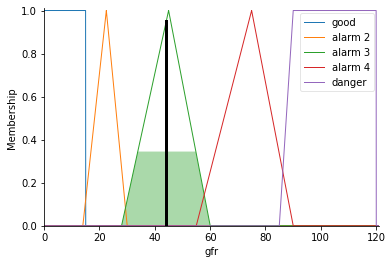

In [87]:
# Test an instance
gfrACE_pred.input['glycaemia'] = 89.0
gfrACE_pred.input['diffACE_neg'] = -2.5
gfrACE_pred.compute()

# Print
gfrACE_res = gfrACE_pred.output['gfr']
dis_str = "Predicted: {val} mL/min".format(val = gfrACE_res)   # Print predicted value
print(dis_str)
gfr.view(sim = gfrACE_pred)   # Display on graph

And for the case of GfrACE this time, our result is about 1 unit higher than authors' one